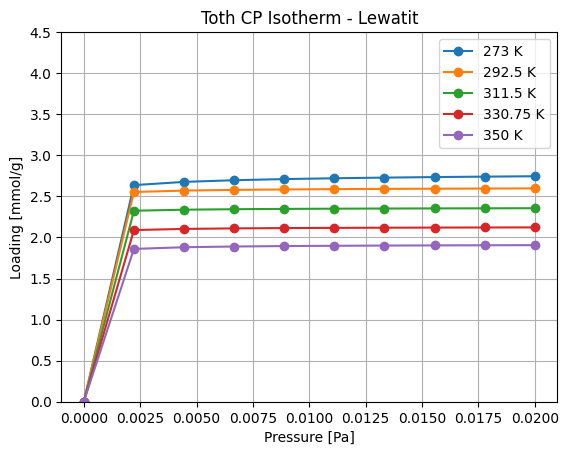

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pymrm as mrm


# p = mrm.non_uniform_grid(0, 100 , 10, 75, 10)*1000
p = np.linspace(0,20,10)
# print(p)

Ea = 0.6e3 # J/mol

deltaH = 105.5e3 # J/mol
deltaHc = 13.5e3 # J/mol

b0 = 1.05e-13 # CHECK ORDER OF MAGNITUDE Unit is Pascal
b0c = 1.03/10 # CHECK ORDER OF MAGNITUDE Unit is Pascal

Rg = 8.31

T0 = 298
Tarray = np.linspace(273,350,5) # Array of temperatures in Kelvin
# print(Tarray)
# Tarray = np.array([298])
labels = ['273 K','292.5 K','311.5 K','330.75 K','350 K']

for i in range(np.size(Tarray)):
    P = p #np.linspace(0,100,10)*1000 #np.linspace(1,5,10)*101325 # Array of pressures in Pascal
    T = Tarray[i]
    q_inf0_constant = 2.56 # mmol/g
    q_infc_constant = 1.05 # mmol/g 

    b = b0*np.exp(deltaH/(Rg*T))
    bc = b0c*np.exp(deltaH/(Rg*T))

    tau0 = 0.343
    alpha = 1.39
    tau = tau0 + alpha*(1 - T0/T)
     
    chi = 1.63
    q_inf_0 = q_inf0_constant*np.exp(chi*(1 - (T/T0)))
    q_inf_c = q_infc_constant*np.exp(chi*(1 - (T/T0)))

    nphys = (q_inf_0*b*P)/((1 + ((b*P)**(tau)))**(1/tau))
    nchem = (q_inf_c*bc*P)/(1 + bc*P)
    eta = np.exp(-Ea/Rg*T)

    # print(tau,q_infc_constant,q_inf0_constant,b,bc)  
    # print(nphys,nchem,eta)

    n = nphys + nchem*eta
    
    
    plt.plot(P/1000,n,marker = 'o', label = labels[i])
 
    plt.xlabel('Pressure [Pa]')
    plt.ylim(0,4.5)
    plt.ylabel('Loading [mmol/g]')
    plt.title('Toth CP Isotherm - Lewatit')
    
    plt.legend()
    
plt.grid()
    # plt.xticks(np.linspace(10),fontsize = 12)
    # plt.yticks(np.linspace(),fontsize = 12)
   
    # print(n)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pymrm as mrm


p = mrm.non_uniform_grid(0, 100 , 10, 75, 10)*1000
# print(p)

Ea = 0.6e3 # J/mol

deltaH = 105.5e3 # J/mol
deltaHc = 13.5e3 # J/mol

b0 = 1.05e-13 # CHECK ORDER OF MAGNITUDE Unit is Pascal
b0c = 1.03/10 # CHECK ORDER OF MAGNITUDE Unit is Pascal

Rg = 8.31

T0 = 298
Tarray = np.linspace(273,350,5) # Array of temperatures in Kelvin
# print(Tarray)
# Tarray = np.array([298])
labels = ['273 K','292.5 K','311.5 K','330.75 K','350 K']

for i in range(np.size(Tarray)):
    P = p #np.linspace(0,100,10)*1000 #np.linspace(1,5,10)*101325 # Array of pressures in Pascal
    T = Tarray[i]
    q_inf0_constant = 2.56 # mmol/g
    q_infc_constant = 1.05 # mmol/g 

    b = b0*np.exp(deltaH/(Rg*T))
    bc = b0c*np.exp(deltaH/(Rg*T))

    tau0 = 0.343
    alpha = 1.39
    tau = tau0 + alpha*(1 - T0/T)
     
    chi = 1.63
    q_inf_0 = q_inf0_constant*np.exp(chi*(1 - (T/T0)))
    q_inf_c = q_infc_constant*np.exp(chi*(1 - (T/T0)))

    nphys = (q_inf_0*b*P)/((1 + ((b*P)**(tau)))**(1/tau))
    nchem = (q_inf_c*bc*P)/(1 + bc*P)
    eta = np.exp(-Ea/Rg*T)

    # print(tau,q_infc_constant,q_inf0_constant,b,bc)  
    # print(nphys,nchem,eta)

    n = nphys + nchem*eta
    
    plt.plot(P/1000,n,marker = 'o', label = labels[i])
    plt.xlabel('Pressure [Pa]')
    plt.ylim(0,4.5)
    plt.ylabel('Loading [mmol/g]')
    plt.title('Toth CP Isotherm - Lewatit')
    
    plt.legend()
    
plt.grid()